In [3]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [4]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

*Note: You are not expected to understand all the computer coding presented with the solutions. You should understand the mathematical concepts and be able to recover the results. We present the computer code so you can learn coding tricks (e.g. read data, compute useful values, fit and plot data) should you be interested.*

# Chapter 6 - Problem Sheet

## Problem 1

### Fitting a powerlaw model

The radio spectrum of most pulsars empirically follows a powerlaw relationship $F(\nu) = F_0 \nu^{\alpha}$, where $F(\nu)$ is the flux at a given frequency $\nu$ in GHz, $F_0$ is the flux at $1\,GHz$ and $\alpha$ is called the powerlaw index. It is common to recover the spectral parameters $F_0$ and $\alpha$ by fitting a straight line using a least-square method as seen in Chapter 5 to a $\log F(\nu)$ vs $log(\nu)$ plot instead due to the non-linear nature of the powerlaw (see the figure below).

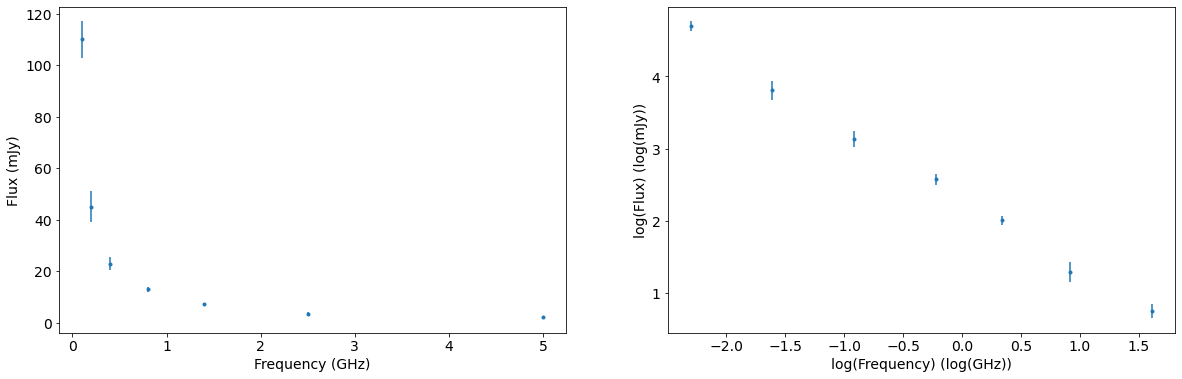

In [3]:
## Creating some mock data
nu = np.r_[             0.1, 0.2, 0.4,  0.8,     1.4, 2.5, 5.0]
Fnu_predicted = np.r_[  100,  50,  25, 12.5, 100./14,   4,   2]
Fnu = np.r_[            110,  45,  23, 13.1,     7.4, 3.6, 2.1]
Fnu_err = np.r_[          7,   6, 2.5,    1,     0.5, 0.5, 0.2]

fig,ax = plt.subplots(1, 2, figsize=[20,6])
_ = ax[0].errorbar(nu, Fnu, yerr=Fnu_err, fmt='.')
_ = ax[1].errorbar(np.log(nu), np.log(Fnu), yerr=Fnu_err/Fnu, fmt='.')

ax[0].set_ylabel('Flux (mJy)')
ax[0].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('log(Flux) (log(mJy))')
ax[1].set_xlabel('log(Frequency) (log(GHz))');

#### Task 1
Using the change of variables $y = \log(F(\nu))$ and $x = \log(\nu)$, show that the powerlaw model can be written as $y = mx + b$.<br><br>

#### Task 2
Find an expression for the uncertainty on $y$, $\Delta y$, given that the fluxes have uncertainties $\Delta F$.<br><br>

#### Task 3
Discuss the validity of the method of fitting a straight line to the log-log relationship. In particular, comment on what approximation is made and when it is no longer appropriate to use this method.

## Solution 1

### Task 1

From the initial relationship, we can log on both sides:
\begin{eqnarray}
  F      &=& F_0 \nu^\alpha \\
  \log F &=& \log (F_0 \nu^\alpha) \\
         &=& \log F_0 + \alpha \log \nu \,.
\end{eqnarray}

The above is precisely the desired form $y = mx + b$ with the stated change of variables, where $m = \alpha$ and $b = \log F_0$.

### Task 2

We can use the standard propagation of error to calculate the uncertainty $\Delta y$:
\begin{eqnarray}
  (\Delta y)^2 &\approx& \left( \frac{\partial y}{\partial F} \right)^2 (\Delta F)^2 \\
               &\approx& \left( \frac{1}{F} \right)^2 (\Delta F)^2 \,.
\end{eqnarray}

Therefore, $\Delta y = \Delta F / F$.

### Task 3

This method appropximates that the error on the flux, which is symmetric and Gaussian, is also symmetric and Gaussian once it is transformed to the log-log space. This is true as long as the relative uncertainty, $\Delta F / F$, is relatively small ($\lesssim 10\%$) as beyond non-linear effects start becoming non-negligible.

## Problem 2

### Random number generation

#### Task 1

Calculate the various modulous quantities:

a) $5 \operatorname{mod} 21$<br>
b) $1023 \operatorname{mod} 500$<br>
d) $83 \operatorname{mod} 15$<br>
d) $345 \operatorname{mod} 8943$<br>

### Task 2

Given that the following sequence of pseudo-random numbers was produced with a multiplicative congruential generator, provide the next 3 numbers in the sequence: {2, 5, 38, 54, 21, 89, 105, 2}.

## Solution 2

### Task 1

a) 5 <br>
b) 23 <br>
c) 8 <br>
d) 345

### Task 2

The next 3 numbers would be: {5, 38, 54}. There is no need to know the parameters used to generate this sequence as the MCG is deterministic. Indeed, it predicts that the sequence of pseudo-random numbers will repeat as soon as one of the previously drawn numbers come back.

## Problem 3

### Rejection sampling integration

Calculate the integral of $10 \cos (x \pi)$ in the range $x = [0, 0.5]$ using the rejection sampling integration. To do so, you will use a Monte Carlo with 10 draws generated with an LCG with modulus 89, multiplier 3 and increment 1.

#### Task 1
Generate 20 draws using this LCG. Initialise your sequence using seed value $n_0 = 71$.<br><br>

#### Task 2
Use the first 10 draws to create the sequence $x_i$.<br><br>

#### Task 3
Use the following 10 draws to generate your $r_i$.<br><br>

#### Task 4
Calculate the integral using the rejection sampling.<br><br>

#### Task 5
How does the value compare with the integral calculated analytically?

## Solution 3

### Task 1

An MCG generates pseudo-random numbers using the recursive formula $n_{i+1} = (a n_i) \operatorname{mod} m$. For this problem we have:

In [8]:
## We will try the multiplicative conguential generator method

## These are the initial parameters
seed = 71
a = 3
m = 89
c = 1

n = []
n_ii = seed
draws = 10
## We calculate 6 random numbers after the seed
for i in range(2*draws+1):
    n_i = n_ii
    print('i: {}'.format(i))
    print('  n_i: {}'.format(n_i))
    anc = a*n_i+c
    n_ii = anc%m
    n.append( n_ii )
    print('  (a*n_i+1) mod m: ({}*{}+{}) mod {} = {} mod {} = {}'.format(a,n_i,c,m,anc,m,n_ii))

i: 0
  n_i: 71
  (a*n_i+1) mod m: (3*71+1) mod 89 = 214 mod 89 = 36
i: 1
  n_i: 36
  (a*n_i+1) mod m: (3*36+1) mod 89 = 109 mod 89 = 20
i: 2
  n_i: 20
  (a*n_i+1) mod m: (3*20+1) mod 89 = 61 mod 89 = 61
i: 3
  n_i: 61
  (a*n_i+1) mod m: (3*61+1) mod 89 = 184 mod 89 = 6
i: 4
  n_i: 6
  (a*n_i+1) mod m: (3*6+1) mod 89 = 19 mod 89 = 19
i: 5
  n_i: 19
  (a*n_i+1) mod m: (3*19+1) mod 89 = 58 mod 89 = 58
i: 6
  n_i: 58
  (a*n_i+1) mod m: (3*58+1) mod 89 = 175 mod 89 = 86
i: 7
  n_i: 86
  (a*n_i+1) mod m: (3*86+1) mod 89 = 259 mod 89 = 81
i: 8
  n_i: 81
  (a*n_i+1) mod m: (3*81+1) mod 89 = 244 mod 89 = 66
i: 9
  n_i: 66
  (a*n_i+1) mod m: (3*66+1) mod 89 = 199 mod 89 = 21
i: 10
  n_i: 21
  (a*n_i+1) mod m: (3*21+1) mod 89 = 64 mod 89 = 64
i: 11
  n_i: 64
  (a*n_i+1) mod m: (3*64+1) mod 89 = 193 mod 89 = 15
i: 12
  n_i: 15
  (a*n_i+1) mod m: (3*15+1) mod 89 = 46 mod 89 = 46
i: 13
  n_i: 46
  (a*n_i+1) mod m: (3*46+1) mod 89 = 139 mod 89 = 50
i: 14
  n_i: 50
  (a*n_i+1) mod m: (3*50+1) mod 89 =

### Task 2

The boundaries of the integral are $[a,b] = [0,0.5]$. As per the lecture notes, we obtain the $x_j$ using $x_j = a + r_j(b-a) = (n_j/89)*0.5$. Therefore, we get the following sequence (using the first 10 $n_i$):

In [5]:
x = []
for i in range(draws):
    x.append( np.round(n[i]/89*0.5,3) )
    print('j: {:2}, x_{}: {:.3f}'.format(i+1, i+1, x[i]))

j:  1, x_1: 0.202
j:  2, x_2: 0.112
j:  3, x_3: 0.343
j:  4, x_4: 0.034
j:  5, x_5: 0.107
j:  6, x_6: 0.326
j:  7, x_7: 0.483
j:  8, x_8: 0.455
j:  9, x_9: 0.371
j: 10, x_10: 0.118


### Task 3

We obtain the $u_j$ using $u_j = n_j/m = n_j/89$. Therefore, we get the following sequence (using the next 10 $n_i$):

In [6]:
u = []
for i in range(draws):
    u.append( np.round(n[i+10]/89,3) )
    print('j: {:2}, u_{}: {:.3f}'.format(i+1, i+1, u[i]))

j:  1, u_1: 0.719
j:  2, u_2: 0.169
j:  3, u_3: 0.517
j:  4, u_4: 0.562
j:  5, u_5: 0.697
j:  6, u_6: 0.101
j:  7, u_7: 0.315
j:  8, u_8: 0.955
j:  9, u_9: 0.876
j: 10, u_10: 0.640


### Task 4

A draw is accepted if $u_j < f(x_j) / f_{\rm max}$. It is most convenient to choose a maximum for the bounding box $f_{\rm max} = 10$. Therefore:

In [7]:
accept = []
for i in range(draws):
    accept.append( u[i] < np.cos(x[i]*np.pi) )
    print('j: {:2}, {:.3f} < {:.3f}: {}'.format(i+1, u[i], np.cos(x[i]*np.pi), accept[i]))

print()
print('Number accepted: {}'.format(np.sum(accept)))

j:  1, 0.719 < 0.805: True
j:  2, 0.169 < 0.939: True
j:  3, 0.517 < 0.473: False
j:  4, 0.562 < 0.994: True
j:  5, 0.697 < 0.944: True
j:  6, 0.101 < 0.520: True
j:  7, 0.315 < 0.053: False
j:  8, 0.955 < 0.141: False
j:  9, 0.876 < 0.394: False
j: 10, 0.640 < 0.932: True

Number accepted: 6


The integral is $\int_0^{0.5} \cos (x\pi) {\rm d}x \approx \frac{6}{10} \cdot 0.5 \cdot 10 = 3$

### Task 5

The integral is equal to $10 \frac{\sin(x \pi)}{\pi} \Big\rvert_0^{0.5} = 10 \cdot 0.318 = 3.18$. This is actually not bad. However with such a small number of draws the actual result can vary widely.

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>